In [23]:
import numpy as np
import matplotlib.pyplot as plt



In [24]:
#read data.npy
data = np.load('data.npy')
x = data[0]
y = data[1]

In [25]:
print(data.shape)

(2, 100, 1)


In [26]:
print(x[0][0])

0.042828681417311144


In [27]:
print(x.shape)

(100, 1)


In [28]:
print(y.shape)

(100, 1)


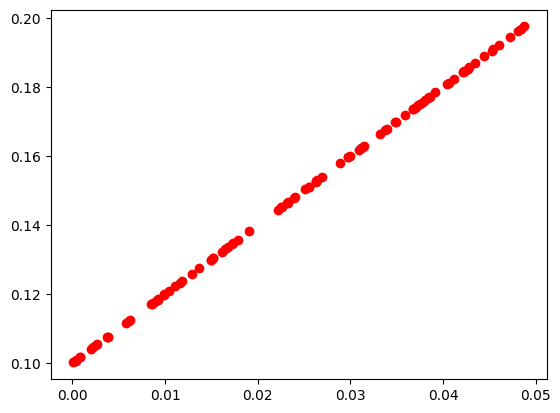

In [29]:
plt.plot(x, y, 'ro')

In [36]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]

# Initialize weights and bias for a single-layer perceptron
input_dim = x.shape[1]  # Number of features
output_dim = 1  # We have one output (regression task)

# Weights and bias initialization (random values)
weights = np.random.randn(input_dim, output_dim) * 0.01
bias = np.zeros((1, output_dim))

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative (for backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Define training parameters
learning_rate = 0.1
epochs = 500000

# Training loop
for epoch in range(epochs):
    # Forward pass
    z = np.dot(x, weights) + bias  # Linear combination
    predictions = sigmoid(z)  # Sigmoid activation
    
    # Compute loss (Mean Squared Error)
    loss = np.mean((predictions - y) ** 2)
    
    # Backward pass
    d_loss = 2 * (predictions - y) / y.size  # Derivative of loss
    d_predictions = d_loss * sigmoid_derivative(predictions)  # Gradient of sigmoid

    # Update weights and bias using the gradients
    weights -= learning_rate * np.dot(x.T, d_predictions)
    bias -= learning_rate * np.sum(d_predictions, axis=0, keepdims=True)
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")

# Final weights and biases
print("\nFinal Model Parameters:")
print("Weights:", weights)
print("Bias:", bias)

# Test the model
test_predictions = sigmoid(np.dot(x, weights) + bias)
print("\nPredictions (first 5 samples):", test_predictions[:5].flatten())


Epoch 500/500000, Loss: 0.0011163128684436787
Epoch 1000/500000, Loss: 0.0008422760387159432
Epoch 1500/500000, Loss: 0.0008336007081748167
Epoch 2000/500000, Loss: 0.0008327377115484178
Epoch 2500/500000, Loss: 0.0008321682737405424
Epoch 3000/500000, Loss: 0.0008316107002065452
Epoch 3500/500000, Loss: 0.0008310539508137176
Epoch 4000/500000, Loss: 0.0008304975888855162
Epoch 4500/500000, Loss: 0.0008299415969163896
Epoch 5000/500000, Loss: 0.0008293859739973436
Epoch 5500/500000, Loss: 0.0008288307198762222
Epoch 6000/500000, Loss: 0.000828275834326842
Epoch 6500/500000, Loss: 0.0008277213171241139
Epoch 7000/500000, Loss: 0.0008271671680430796
Epoch 7500/500000, Loss: 0.0008266133868588786
Epoch 8000/500000, Loss: 0.000826059973346746
Epoch 8500/500000, Loss: 0.0008255069272820152
Epoch 9000/500000, Loss: 0.0008249542484401166
Epoch 9500/500000, Loss: 0.0008244019365965767
Epoch 10000/500000, Loss: 0.0008238499915270204
Epoch 10500/500000, Loss: 0.0008232984130071689
Epoch 11000/50

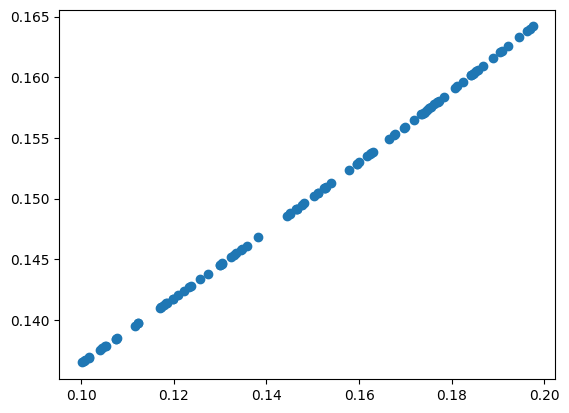

In [38]:
y_pred = sigmoid(weights * x + bias)
plt.plot(y, y_pred, 'o')

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
data = np.load("data.npy")
x, y = data[0], data[1]


# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Ensure y is a column vector

# Define the Multi-Layer Perceptron (MLP)
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim):
        super(MultiLayerPerceptron, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_dim, 1)  # Input layer to hidden layer 1 (64 neurons)
        self.activation = nn.Sigmoid()      # Sigmoid activation for regression output
    
    def forward(self, x):
        x = self.activation(self.fc1(x))   # Apply Sigmoid for output layer
        return x

# Model parameters
input_dim = x.shape[1]  # Number of features
model = MultiLayerPerceptron(input_dim)

# Define loss and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer for better learning

# Training loop
epochs = 5000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x_tensor)
    
    # Compute loss
    loss = criterion(predictions, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print loss every 500 epochs
    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Final weights and biases
print("\nFinal Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

# Test the model
with torch.no_grad():
    test_predictions = model(x_tensor)
    print("\nPredictions (first 5 samples):", test_predictions[:5].numpy())


Epoch 500/5000, Loss: 0.10144849121570587
Epoch 1000/5000, Loss: 0.04995446279644966
Epoch 1500/5000, Loss: 0.024255460128188133
Epoch 2000/5000, Loss: 0.011932956986129284
Epoch 2500/5000, Loss: 0.0060476092621684074
Epoch 3000/5000, Loss: 0.00325421872548759
Epoch 3500/5000, Loss: 0.0019635832868516445
Epoch 4000/5000, Loss: 0.001400212524458766
Epoch 4500/5000, Loss: 0.0011747534153982997
Epoch 5000/5000, Loss: 0.001091422513127327

Final Model Parameters:
fc1.weight: tensor([[-2.0797]])
fc1.bias: tensor([-1.6565])

Predictions (first 5 samples): [[0.14860943]
 [0.15999748]
 [0.15773554]
 [0.15162322]
 [0.1591686 ]]


Model Performance on Training Data:
Mean Squared Error (MSE): 0.0011
R-squared (R²): -0.3117


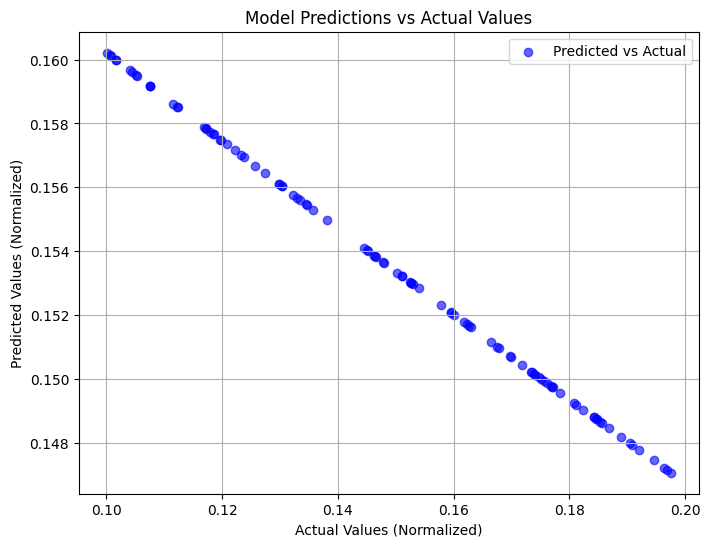

Prediction for first sample: 0.1486
Actual value for first sample: 0.1857


In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on the training data
with torch.no_grad():
    y_pred = model(x_tensor)  # Predictions on the training data
    y_pred_np = y_pred.numpy()  # Convert predictions to NumPy
    y_true_np = y_tensor.numpy()  # Convert actual values to NumPy

# Calculate performance metrics
mse = mean_squared_error(y_true_np, y_pred_np)  # Mean Squared Error
r2 = r2_score(y_true_np, y_pred_np)            # R-squared score

# Print performance metrics
print("Model Performance on Training Data:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_true_np, y_pred_np, color="blue", alpha=0.6, label="Predicted vs Actual")
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Actual Values (Normalized)")
plt.ylabel("Predicted Values (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Example: Testing on a single sample
single_sample = x_tensor[0].unsqueeze(0)  # Select the first sample and add batch dimension
with torch.no_grad():
    single_prediction = model(single_sample)
print(f"Prediction for first sample: {single_prediction.item():.4f}")
print(f"Actual value for first sample: {y_tensor[0].item():.4f}")
